In [6]:
pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 42.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
image_path = '/Users/vijaym/Downloads/Image dataset 4GB/flickr30k_images 2'

In [11]:
data = pd.read_csv("/Users/dimpu/Downloads/Project/Image dataset 4GB/Captions/captions.txt")
data.head(10)

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their ...
1,1000092795.jpg,1,Two young White males are outside near many b...
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .
5,10002456.jpg,0,Several men in hard hats are operating a giant...
6,10002456.jpg,1,Workers look down from up above on a piece of ...
7,10002456.jpg,2,Two men working on a machine wearing hard hats .
8,10002456.jpg,3,Four men on top of a tall structure .
9,10002456.jpg,4,Three men on a large rig .


In [17]:
import os

# Set paths
image_folder = '/Users/dimpu/Downloads/Project/Image dataset 4GB/flickr30k_images 2'
caption_file = "/Users/dimpu/Downloads/Project/Image dataset 4GB/Captions/captions.txt"  # Assuming captions are in a text file

# Count images
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
print(f"Total images: {len(image_files)}")

# Count captions (if each line is a caption for an image)
with open(caption_file, 'r') as file:
    captions = file.readlines()
print(f"Total captions: {len(captions)}")


Total images: 31782
Total captions: 158916


In [19]:
import os
import cv2

folder_path = '/Users/dimpu/Downloads/Project/Image dataset 4GB/flickr30k_images 2'  # Replace with your actual folder path
corrupted_count = 0
good_count = 0

for file_name in os.listdir(folder_path):
    image_path = os.path.join(folder_path, file_name)

    try:
        # Open the image
        img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

        # Check if the image is empty (i.e., corrupted)
        if img is None:
            print(f"Corrupted image: {image_path}")
            corrupted_count += 1
        else:
            good_count += 1

    except Exception as e:
        print(f"Error processing image: {image_path}, Error: {e}")

print("Corrupted images:", corrupted_count)
print("Good files:", good_count)


Corrupted images: 0
Good files: 31782


In [21]:
from PIL import Image
from PIL.ExifTags import TAGS
import os

def get_image_metadata(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        metadata = {}
        
        # Extract EXIF data
        exif_data = img._getexif()
        if exif_data:
            for tag, value in exif_data.items():
                tag_name = TAGS.get(tag, tag)
                metadata[tag_name] = value
        else:
            metadata = "No EXIF data found"
    
    return metadata

def extract_metadata_from_folder(folder_path, limit=3):
    metadata_list = []
    files = os.listdir(folder_path)
    images = [file for file in files if file.lower().endswith(('.jpg', '.jpeg', '.png'))]

    for i, image_file in enumerate(images[:limit]):
        image_path = os.path.join(folder_path, image_file)
        metadata = get_image_metadata(image_path)
        metadata_list.append((image_file, metadata))

    return metadata_list

# Example usage
folder_path = '/Users/dimpu/Downloads/Project/Image dataset 4GB/flickr30k_images 2'  # Update this to your image folder path
metadata = extract_metadata_from_folder(folder_path)

for i, (image_file, meta) in enumerate(metadata, start=1):
    print(f"Metadata for Image {i} ({image_file}):\n{meta}\n")


Metadata for Image 1 (2609797461.jpg):
No EXIF data found

Metadata for Image 2 (1788892671.jpg):
No EXIF data found

Metadata for Image 3 (129860826.jpg):
No EXIF data found



In [23]:
from PIL import Image
import os
from collections import Counter

def get_image_dimensions(folder_path):
    dimensions = []
    files = os.listdir(folder_path)
    images = [file for file in files if file.lower().endswith(('.jpg', '.jpeg', '.png'))]

    for image_file in images:
        image_path = os.path.join(folder_path, image_file)
        with Image.open(image_path) as img:
            dimensions.append(img.size)  # img.size returns a tuple (width, height)

    dimension_counts = Counter(dimensions)
    return dimension_counts

# Example usage
folder_path = '/Users/dimpu/Downloads/Project/Image dataset 4GB/flickr30k_images 2'  # Update this to your image folder path
dimension_counts = get_image_dimensions(folder_path)

print("Image dimensions and their counts:")
for dimension, count in dimension_counts.items():
    print(f"Dimension {dimension[0]}x{dimension[1]}: {count} images")


Image dimensions and their counts:
Dimension 500x332: 1288 images
Dimension 500x299: 21 images
Dimension 500x333: 6421 images
Dimension 375x500: 2310 images
Dimension 500x375: 6247 images
Dimension 500x334: 1415 images
Dimension 500x456: 7 images
Dimension 428x500: 7 images
Dimension 500x292: 18 images
Dimension 333x500: 2570 images
Dimension 360x500: 15 images
Dimension 500x402: 23 images
Dimension 500x500: 540 images
Dimension 500x400: 345 images
Dimension 500x241: 6 images
Dimension 334x500: 483 images
Dimension 500x281: 315 images
Dimension 500x335: 385 images
Dimension 388x500: 12 images
Dimension 500x374: 139 images
Dimension 500x365: 33 images
Dimension 500x413: 16 images
Dimension 500x357: 188 images
Dimension 353x500: 19 images
Dimension 500x406: 20 images
Dimension 500x246: 5 images
Dimension 500x367: 38 images
Dimension 331x500: 75 images
Dimension 500x306: 27 images
Dimension 298x500: 5 images
Dimension 500x331: 242 images
Dimension 500x394: 20 images
Dimension 368x500: 23 

In [25]:
file_sizes = [os.path.getsize(os.path.join(image_folder, img)) for img in image_files]
print(f"Average file size: {sum(file_sizes) / len(file_sizes)} bytes")
print(f"Min file size: {min(file_sizes)} bytes")
print(f"Max file size: {max(file_sizes)} bytes")
# format the output for better readability
print(f"Size range: {min(file_sizes)} bytes - {max(file_sizes)} bytes")

Average file size: 138951.42413945 bytes
Min file size: 10630 bytes
Max file size: 433840 bytes
Size range: 10630 bytes - 433840 bytes


In [27]:
# Assuming each line in the caption file corresponds to an image
caption_lengths = [len(caption.split()) for caption in captions]
print(f"Average caption length: {sum(caption_lengths) / len(caption_lengths)} words")
print(f"Min caption length: {min(caption_lengths)} words")
print(f"Max caption length: {max(caption_lengths)} words")


Average caption length: 13.235187142893102 words
Min caption length: 1 words
Max caption length: 79 words


In [29]:
import hashlib
from collections import Counter
import os

# Function to generate hash of an image file
def generate_image_hash(image_path):
    with open(image_path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()

# Detect duplicates
hashes = [generate_image_hash(os.path.join(image_folder, img)) for img in image_files]
duplicates = [item for item, count in Counter(hashes).items() if count > 1]

# Get the duplicated image IDs
duplicated_image_ids = []
for item in duplicates:
    ids = [image_files[i] for i, img_hash in enumerate(hashes) if img_hash == item]
    duplicated_image_ids.extend(ids)

# Print the number of duplicate images and their IDs
print(f"Number of duplicate images: {len(duplicates)}")
for i, img in enumerate(duplicated_image_ids):
    print(f"Duplicate image {i+1}: {img}")


Number of duplicate images: 0


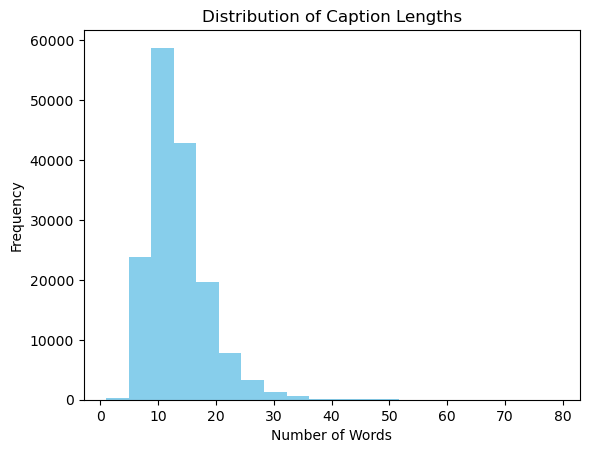

In [31]:
import matplotlib.pyplot as plt

plt.hist(caption_lengths, bins=20, color='skyblue')
plt.title("Distribution of Caption Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [7]:
# Importing necessary libraries
import pandas as pd  # Pandas for data manipulation
import numpy as np   # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for plotting
import seaborn as sns  # Seaborn for statistical data visualization
sns.set(style="whitegrid")  # Set seaborn style to whitegrid for plots

# Operating System related functionality
import os

# OpenCV library for computer vision tasks
import cv2

# Glob module finds all the pathnames matching a specified pattern
from glob import glob

# Python Imaging Library for image processing tasks
from PIL import Image

# TensorFlow library for machine learning tasks
import tensorflow as tf

# Keras, a high-level neural networks API, running on top of TensorFlow
import keras

# Importing required modules from Keras
from keras.applications import VGG16
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam



# TensorFlow-specific imports
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from keras.models import Sequential
from tensorflow.keras.applications import VGG16


In [9]:
# Define the model
Model = keras.models.Sequential([
    # First convolutional layer with 32 filters, kernel size of 3x3, and ReLU activation
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    # Max pooling layer with pool size of 2x2
    MaxPool2D(2, 2),
    # Second convolutional layer with 64 filters, kernel size of 3x3, and ReLU activation
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    # Max pooling layer with pool size of 2x2
    MaxPool2D(2, 2),
    # Third convolutional layer with 128 filters, kernel size of 3x3, and ReLU activation
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    # Max pooling layer with pool size of 2x2
    MaxPool2D(2, 2),
    # Flatten layer to convert 2D feature maps into a 1D feature vector
    Flatten(),
    # Fully connected layer with 1024 neurons and ReLU activation
    Dense(1024, activation='relu'),
    # Dropout layer with dropout rate of 0.5 to prevent overfitting
    Dropout(0.5),
    # Output layer with 6 neurons for classification (assuming 6 classes) and softmax activation
    Dense(6, activation='softmax')
])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
Model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    37,880,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,980,230 (144.88 MB)

 Trainable params: 37,980,230 (144.88 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu')
])




/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │       263,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 635,776 (2.43 MB)

 Trainable params: 634,880 (2.42 MB)

 Non-trainable params: 896 (3.50 KB)

In [45]:
# Import necessary libraries
import os
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tqdm import tqdm

# Define the base directory and image folder path
BASE_DIR = '/Users/dimpu/Downloads/Project/Image dataset 4GB'
directory = os.path.join(BASE_DIR, 'flickr30k_images 2')

# Create an instance of the VGG16 model with weights loaded from Keras
model = VGG16(weights='imagenet', include_top=True)

# Create an empty dictionary to store the features
features = {}

# Loop through each image in the directory
for img_name in tqdm(os.listdir(directory)):
    # Load the image from file
    img_path = directory + '/' + img_name
    img = load_img(img_path, target_size=(224, 224))

    # Convert the image pixels to a numpy array
    image = img_to_array(img)

    # Reshape and convert the data to a 4D array (batch size of 1)
    image = np.array(image).reshape((1, 224, 224, 3))

    # Preprocess the image data for VGG16
    # Use the model's expectation to normalize pixel values to be between 0 and 1 (0-based indexing)
    image = model.preprocess_input(image)

    # Extract features from the model
    feature = model.predict(image, verbose=0)

    # Split the image name to get the ID
    img_id = img_name.split('.')[0]

    # Store the feature in the dictionary
    features[img_id] = feature

# Print the extracted features
print(features)


  0%|                                                 | 0/31782 [00:00<?, ?it/s]


AttributeError: 'Functional' object has no attribute 'preprocess_input'

In [ ]:
# Import necessary libraries
import os
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tqdm import tqdm

# Define the base directory and image folder path
BASE_DIR = '/Users/dimpu/Downloads/Project/Image dataset 4GB'
directory = os.path.join(BASE_DIR, 'flickr30k_images 2')


# Create an instance of the VGG16 model with weights loaded from Keras
model = VGG16(weights='imagenet', include_top=True)

# Create an empty dictionary to store the features
features = {}

# Loop through each image in the directory
for img_name in tqdm(os.listdir(directory)):
    # Load the image from file
    img_path = directory + '/' + img_name
    img = load_img(img_path, target_size=(224, 224))

    # Convert the image pixels to a numpy array
    image = img_to_array(img)

    # Reshape and convert the data to a 4D array (batch size of 1)
    image = np.array(image).reshape((1, 224, 224, 3))

    # Normalize pixel values to be between 0 and 1 (0-based indexing)
    image = image / 255.0

    # Extract features from the model
    feature = model.predict(image, verbose=0)

    # Split the image name to get the ID
    img_id = img_name.split('.')[0]

    # Store the feature in the dictionary
    features[img_id] = feature

# Print the extracted features
print(features)


  1%|▏                                    | 206/31782 [00:23<1:00:46,  8.66it/s]